# i. Introduction

This project is designed to display data visualization and analysis of credit card customer payment information, showcasing characteristics of customers who fail to make payments and those who can make payments.

# ii. Import Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# iii. Data Loading

In [5]:
#load data from csv
df=pd.read_csv('credit_customers.csv')

In [27]:
#show first 10 data from csv
df.head(10)

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4,male single,none,...,real estate,67,none,own,2,skilled,1,yes,yes,good
1,0<=X<200,48,existing paid,radio/tv,5951.0,<100,1<=X<4,2,female div/dep/mar,none,...,real estate,22,none,own,1,skilled,1,none,yes,bad
2,no checking,12,critical/other existing credit,education,2096.0,<100,4<=X<7,2,male single,none,...,real estate,49,none,own,1,unskilled resident,2,none,yes,good
3,<0,42,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2,male single,guarantor,...,life insurance,45,none,for free,1,skilled,2,none,yes,good
4,<0,24,delayed previously,new car,4870.0,<100,1<=X<4,3,male single,none,...,no known property,53,none,for free,2,skilled,2,none,yes,bad
5,no checking,36,existing paid,education,9055.0,no known savings,1<=X<4,2,male single,none,...,no known property,35,none,for free,1,unskilled resident,2,yes,yes,good
6,no checking,24,existing paid,furniture/equipment,2835.0,500<=X<1000,>=7,3,male single,none,...,life insurance,53,none,own,1,skilled,1,none,yes,good
7,0<=X<200,36,existing paid,used car,6948.0,<100,1<=X<4,2,male single,none,...,car,35,none,rent,1,high qualif/self emp/mgmt,1,yes,yes,good
8,no checking,12,existing paid,radio/tv,3059.0,>=1000,4<=X<7,2,male div/sep,none,...,real estate,61,none,own,1,unskilled resident,1,none,yes,good
9,0<=X<200,30,critical/other existing credit,new car,5234.0,<100,unemployed,4,male mar/wid,none,...,car,28,none,own,2,high qualif/self emp/mgmt,1,none,yes,bad


In [28]:
#check is there any missing value from data
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [8]:
#check data type from each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

In [9]:
#change data type to int for 'age','duration','installment_commitment','residence_since','existing_credits','num_dependents' column
to_integer = ['age','duration','installment_commitment','residence_since','existing_credits','num_dependents']
for i in to_integer:
    df[i] = df[i].astype(int)

In [10]:
#check is there any white space at column name
df.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

In [11]:
#make new variable for checking unique value
columns = ['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class']

In [12]:
#checking unique value is there need to do cardinality and there's no need to do cardinality
for i in columns :
    cek_nunique = df[i].nunique()
    print (i,cek_nunique)

checking_status 4
duration 33
credit_history 5
purpose 10
credit_amount 921
savings_status 5
employment 5
installment_commitment 4
personal_status 4
other_parties 3
residence_since 4
property_magnitude 4
age 53
other_payment_plans 3
housing 3
existing_credits 4
job 4
num_dependents 2
own_telephone 2
foreign_worker 2
class 2


In [13]:
#checking value from each column
df.value_counts()

checking_status  duration  credit_history  purpose              credit_amount  savings_status    employment  installment_commitment  personal_status     other_parties  residence_since  property_magnitude  age  other_payment_plans  housing   existing_credits  job                        num_dependents  own_telephone  foreign_worker  class
0<=X<200         6         all paid        education            433.0          >=1000            <1          4                       female div/dep/mar  none           2                life insurance      24   bank                 rent      1                 skilled                    2               none           yes             bad      1
no checking      10        existing paid   new car              1364.0         <100              1<=X<4      2                       female div/dep/mar  none           4                car                 64   none                 own       1                 skilled                    1               yes            

# iv. Exploratory Data Analyst

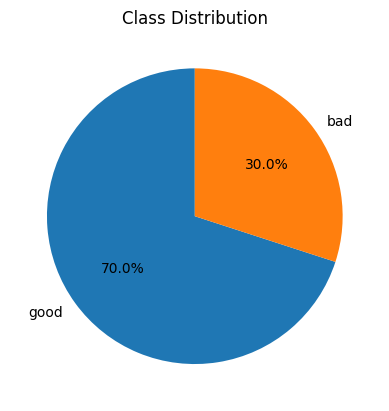

In [15]:
#Pie chart from class column to show how many precetage customer that can pay credit card or not
class_freq = df['class'].value_counts()

plt.pie(class_freq, labels=class_freq.index, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

Result: 

It can be observed that the percentage of customers failing to make credit card payments is still relatively high at 30%.

Insight: 

Implement more stringent customer screening by examining credit scores and past payment history. Establish standards for customers applying for credit cards to avoid the potential of defaults.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

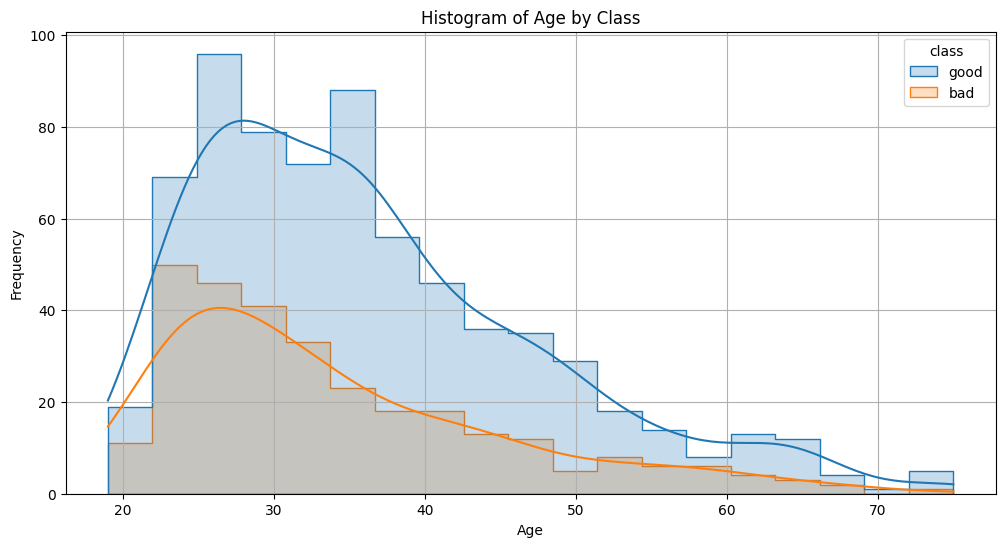

In [18]:
#Histogram of Age based on Class
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x="age", hue="class", element="step", kde=True)
plt.title('Histogram of Age by Class')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


Result : 

Percentage of customers who cannot pay compared to those who can pay at the age of 55-65, where at that age customers may no longer work and young people aged 18-25
 
Insight : 

For customers who have this age range, we can ask the customer to re-update the data. For those who don't have a permanent income, they can ask for a beneficial owner where the customer gets income from a third party, either from their children/relatives. To reduce the percentage in that age range, they can't pay because they don't. have an income and are given an age threshold to apply for a credit card 

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

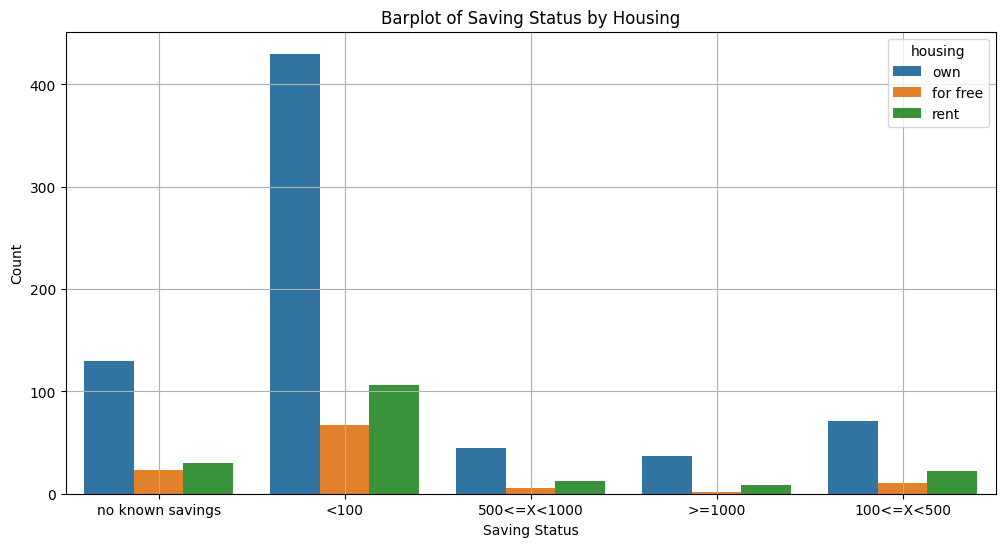

In [26]:
#Barplot Saving Status based on Housing 

plt.figure(figsize=(12, 6))
sns.countplot(x='savings_status', hue='housing', data=df)
plt.title('Barplot of Saving Status by Housing')
plt.xlabel('Saving Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()


Result: 

Customers who have a savings balance of 0 and savings are unknown. Customers who don't own a home have a big potential for failure to pay
 
Insight: 

Set a threshold for a minimum savings balance to apply for a credit card and can see the status of home ownership as a reference for whether a customer will give credit or not 

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

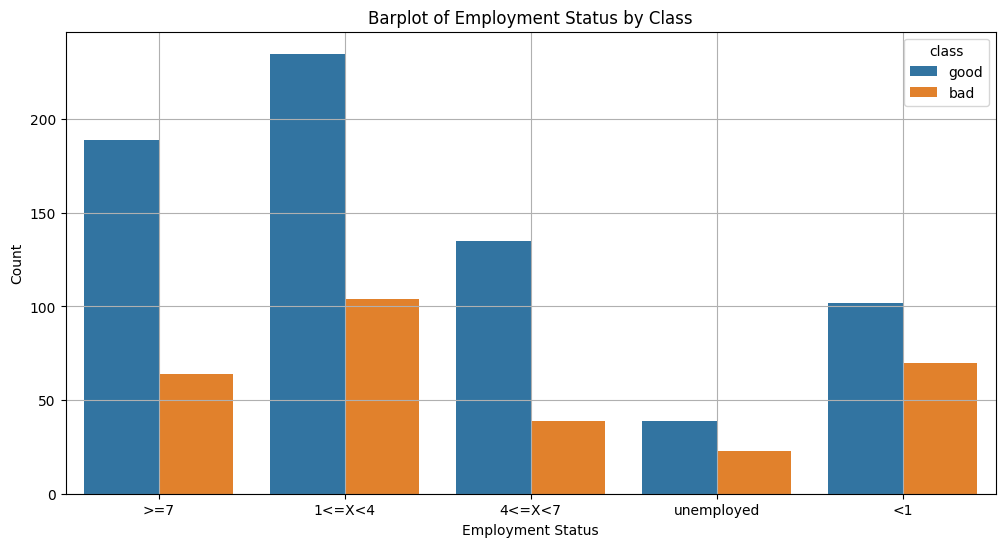

In [23]:
#Barplot of Employment Status based on Class

plt.figure(figsize=(12, 6))
sns.countplot(x='employment', hue='class', data=df)
plt.title('Barplot of Employment Status by Class')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.grid(True)
plt.show()

Result: 

It can be observed that customers with longer work experience have a higher potential to successfully pay off their credit cards compared to those with less work experience.


Implement segmentation in the issuance of credit card types based on work experience and provide credit limits based on work experience and income to avoid defaults.

c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\kenne\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is depr

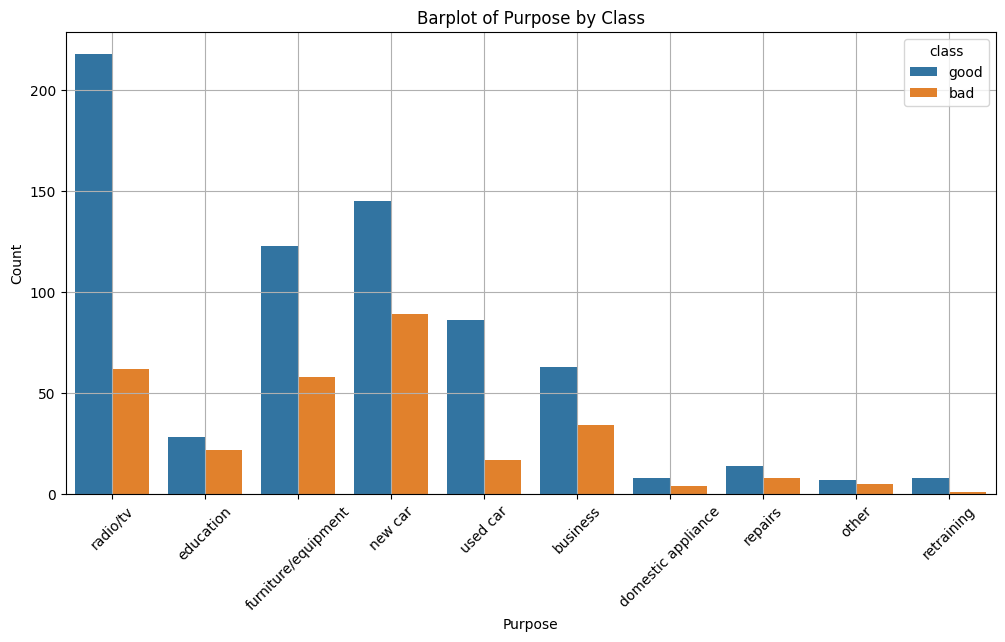

In [29]:
#Barplot of Purpose based on Class


plt.figure(figsize=(12, 6))
sns.countplot(x='purpose', hue='class', data=df)
plt.title('Barplot of Purpose by Class')
plt.xlabel('Purpose')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.grid(True)
plt.show()

Result:

The percentage of defaults is highest when purchasing new cars, businesses and furniture where these items are quite expensive 

Insight: 

If the customer's profile does not match the credit limit, don't give a high limit. If the customer wants to have a high limit, you can include a pay slip or proof of income. 

# v. Conclusion

To reduce credit card defaults, a robust customer screening process is essential, focusing on detailed evaluations of credit scores and past payment histories. For certain age groups, particularly those without steady incomes, periodically updating financial data and considering alternative income sources, like support from family, is crucial. Implementing a minimum savings balance requirement and considering home ownership status can serve as additional financial stability indicators. Credit card offerings and limits should be tailored based on work experience and income, ensuring that customers receive limits aligned with their financial capacity. For higher credit limits, requiring concrete proof of income, such as pay slips, helps match the credit limit with the customer's financial profile, mitigating default risks.